In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report,roc_curve,auc
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read image data
def read_image(data_dir,filepath):
    return cv2.imread(os.path.join(data_dir, filepath))

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size,
                      interpolation=cv2.INTER_AREA)

In [5]:
# Define the path to your directory
directory_path = '/content/drive/My Drive/FaceExpressions/dataset/'

def img_list_return(directory_path,cls_name):
  global image_array_data
  global image_label

  IMAGE_SIZE = 64

  # List all files in the directory
  file_folder = os.path.join(directory_path,cls_name)
  files = os.listdir(file_folder)


  # Print the list of files
  for file in files:
      img_data = read_image(file_folder,file)
      img_data = resize_image(img_data, (IMAGE_SIZE, IMAGE_SIZE))
      img_data = img_data/255
      image_array_data.append(img_data)
      image_label.append(cls_name.lower())

  return image_array_data,image_label

In [6]:
import os
import cv2

# Define the path to your directory
directory_path = '/content/drive/My Drive/FaceExpressions/dataset/'

def read_image(folder, file):
    image_path = os.path.join(folder, file)
    image = cv2.imread(image_path)
    if image is not None:
        # Ensure the image has 3 channels (RGB)
        if len(image.shape) == 2:  # Grayscale image
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        elif image.shape[2] == 4:  # RGBA image
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    return image

def resize_image(image, size):
    return cv2.resize(image, size)

def img_list_return(directory_path, cls_name):
    global image_array_data
    global image_label

    IMAGE_SIZE = 64

    # List all files in the directory
    file_folder = os.path.join(directory_path, cls_name)
    files = os.listdir(file_folder)

    # Print the list of files
    for file in files:
        img_data = read_image(file_folder, file)
        if img_data is not None:  # Check if image reading was successful
            img_data = resize_image(img_data, (IMAGE_SIZE, IMAGE_SIZE))
            img_data = img_data / 255.0
            image_array_data.append(img_data)
            image_label.append(cls_name.lower())

    return image_array_data, image_label

# Initialize the global variables
image_array_data = []
image_label = []


In [7]:
cls_name = "Angry"
image_array_data, image_label = img_list_return(directory_path, cls_name)

In [8]:
cls_name = "Ahegao"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [9]:
cls_name = "Happy"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [10]:
cls_name = "Neutral"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [11]:
cls_name = "Sad"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [12]:
cls_name = "Surprise"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [13]:
image_array_data[0]

array([[[0.54509804, 0.54509804, 0.54509804],
        [0.51372549, 0.51372549, 0.51372549],
        [0.55686275, 0.55686275, 0.55686275],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.52941176, 0.52941176, 0.52941176],
        [0.28627451, 0.28627451, 0.28627451]],

       [[0.61960784, 0.61960784, 0.61960784],
        [0.51764706, 0.51764706, 0.51764706],
        [0.36078431, 0.36078431, 0.36078431],
        ...,
        [0.32941176, 0.32941176, 0.32941176],
        [0.32941176, 0.32941176, 0.32941176],
        [0.30196078, 0.30196078, 0.30196078]],

       [[0.38039216, 0.38039216, 0.38039216],
        [0.36470588, 0.36470588, 0.36470588],
        [0.36470588, 0.36470588, 0.36470588],
        ...,
        [0.37647059, 0.37647059, 0.37647059],
        [0.4       , 0.4       , 0.4       ],
        [0.37647059, 0.37647059, 0.37647059]],

       ...,

       [[0.16470588, 0.16470588, 0.16470588],
        [0.14901961, 0.14901961, 0.14901961],
        [0.18039216, 0

In [14]:
X = np.array(image_array_data)

In [15]:
mapping = {"ahegao": 2, "angry": 0,"happy":1,"sad":3,"neutral":4,"surprise":5}
# Map list values to numerical values
labels = [mapping[value] for value in image_label]

In [16]:
y = np.array(labels)

In [17]:
X.shape

(15477, 64, 64, 3)

In [18]:
y.shape

(15477,)

## Taking sample from dataset

In [19]:
def create_equal_proportion_subset(X, y):
    unique_classes = np.unique(y)
    min_class_count = min([np.sum(y == cls) for cls in unique_classes])

    X_subset = []
    y_subset = []

    for cls in unique_classes:
        class_indices = np.where(y == cls)[0]
        sampled_indices = np.random.choice(class_indices, min_class_count, replace=False)
        X_subset.append(X[sampled_indices])
        y_subset.append(y[sampled_indices])

    X_subset = np.concatenate(X_subset)
    y_subset = np.concatenate(y_subset)

    return X_subset, y_subset

In [20]:
X,y = create_equal_proportion_subset(X, y)

In [21]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (7230, 64, 64, 3)
Shape of y: (7230,)


## Data augmentation

In [22]:
# Function to create balanced dataset with augmentation for classes with fewer samples
def augment_class(X, y, target_class, target_count):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    class_indices = np.where(y == target_class)[0]
    class_samples = X[class_indices]

    augmented_images = []
    while len(augmented_images) < target_count:
        for batch in datagen.flow(class_samples, batch_size=1):
            augmented_images.append(batch[0])
            if len(augmented_images) >= target_count:
                break

    X_augmented = np.concatenate([X, np.array(augmented_images)])
    y_augmented = np.concatenate([y, np.full(len(augmented_images), target_class)])

    return X_augmented, y_augmented

In [23]:
X,y = augment_class(X, y, 0, 60)
X,y = augment_class(X, y, 1, 60)
X,y = augment_class(X, y, 2, 60)
X,y = augment_class(X, y, 3, 60)
X,y = augment_class(X, y, 4, 60)
X,y  = augment_class(X, y, 5, 60)

In [24]:
y = to_categorical(y, num_classes=6)

In [25]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (7590, 64, 64, 3)
Shape of y: (7590, 6)


## Train-Test-Split Dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

def create_cnn_model():
    model = Sequential()

    # Add layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    return model


In [28]:
# Create and compile the model
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [29]:
# Train the model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/5
190/190 [==============================] - 49s 251ms/step - loss: 1.7414 - accuracy: 0.2401
Epoch 2/5
190/190 [==============================] - 47s 247ms/step - loss: 1.4799 - accuracy: 0.3990
Epoch 3/5
190/190 [==============================] - 47s 245ms/step - loss: 1.3102 - accuracy: 0.4794
Epoch 4/5
190/190 [==============================] - 46s 243ms/step - loss: 1.1889 - accuracy: 0.5295
Epoch 5/5
48/48 [==============================] - 5s 92ms/step - loss: 1.0530 - accuracy: 0.5929
Test accuracy: 0.5928853750228882


In [30]:
y_pred_prob = cnn_model.predict(X_test)

48/48 [==============================] - 3s 55ms/step


In [31]:
# Convert predictions and true labels from one-hot encoding to label indices
y_val_pred_classes = np.argmax(y_pred_prob, axis=1)
y_val_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

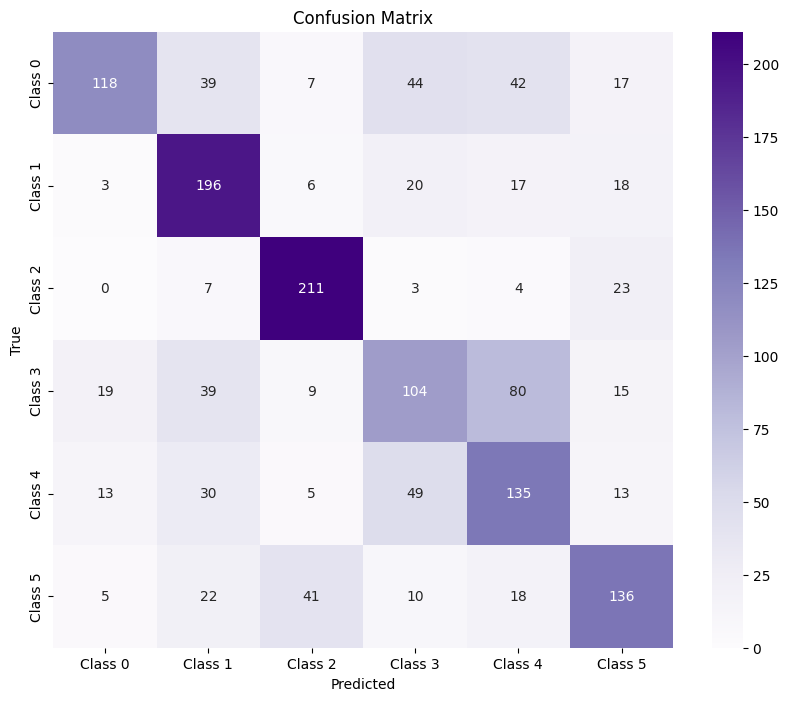

In [32]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=[f'Class {i}' for i in range(6)], yticklabels=[f'Class {i}' for i in range(6)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model Tuning:

In [40]:
# Define function to create the model
def create_model(learning_rate=0.001, dropout_rate=0.5):

    model = models.Sequential([
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(6, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [42]:
# Define hyperparameter ranges
learning_rates = [0.001, 0.0001]
dropout_rates = [0,0.1]

best_accuracy = 0
best_hyperparams = {}

# Empirical tuning
for lr in learning_rates:
    for dr in dropout_rates:
        model = create_model(learning_rate=lr, dropout_rate=dr)
        model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=0)

        # Evaluate the model
        y_val_pred = model.predict(X_test)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        y_val_true_classes = np.argmax(y_test, axis=1)
        accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)

        # Check if this is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparams = {'learning_rate': lr, 'dropout_rate': dr}

48/48 [==============================] - 1s 14ms/step


In [43]:
print(f"Best accuracy: {best_accuracy}")
print(f"Best hyperparameters: {best_hyperparams}")

# Train final model with best hyperparameters
final_model = create_model(learning_rate=best_hyperparams['learning_rate'], dropout_rate=best_hyperparams['dropout_rate'])
history = final_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Best accuracy: 0.44664031620553357
Best hyperparameters: {'learning_rate': 0.0001, 'dropout_rate': 0.1}
Epoch 1/5
190/190 [==============================] - 11s 54ms/step - loss: 1.6835 - accuracy: 0.2922 - val_loss: 1.5668 - val_accuracy: 0.3478
Epoch 2/5
190/190 [==============================] - 8s 42ms/step - loss: 1.5262 - accuracy: 0.3781 - val_loss: 1.5223 - val_accuracy: 0.3702
Epoch 3/5
190/190 [==============================] - 10s 52ms/step - loss: 1.4727 - accuracy: 0.4056 - val_loss: 1.4781 - val_accuracy: 0.3933
Epoch 4/5
190/190 [==============================] - 8s 44ms/step - loss: 1.4192 - accuracy: 0.4343 - val_loss: 1.4606 - val_accuracy: 0.4190
Epoch 5/5
190/190 [==============================] - 9s 50ms/step - loss: 1.3916 - accuracy: 0.4509 - val_loss: 1.4002 - val_accuracy: 0.4440


In [44]:
# Get training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 45.09%
48/48 [==============================] - 1s 14ms/step - loss: 1.4046 - accuracy: 0.4466
Test Accuracy: 44.66%


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = final_model.fit(X_train, y_train, epochs=10, batch_size=36, validation_data=(X_test, y_test))

Epoch 1/10
169/169 [==============================] - 10s 58ms/step - loss: 1.0588 - accuracy: 0.6082 - val_loss: 1.2779 - val_accuracy: 0.4941
Epoch 2/10
169/169 [==============================] - 7s 43ms/step - loss: 1.0484 - accuracy: 0.6092 - val_loss: 1.2863 - val_accuracy: 0.4868
Epoch 3/10
169/169 [==============================] - 9s 53ms/step - loss: 1.0477 - accuracy: 0.6077 - val_loss: 1.2837 - val_accuracy: 0.4967
Epoch 4/10
169/169 [==============================] - 7s 43ms/step - loss: 1.0411 - accuracy: 0.6072 - val_loss: 1.2974 - val_accuracy: 0.4980
Epoch 5/10
169/169 [==============================] - 9s 53ms/step - loss: 1.0346 - accuracy: 0.6092 - val_loss: 1.2951 - val_accuracy: 0.4776
Epoch 6/10
169/169 [==============================] - 7s 41ms/step - loss: 1.0235 - accuracy: 0.6110 - val_loss: 1.2901 - val_accuracy: 0.4928
Epoch 7/10
169/169 [==============================] - 9s 53ms/step - loss: 1.0228 - accuracy: 0.6222 - val_loss: 1.2710 - val_accuracy: 0.502

In [46]:
# Get training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test dataset
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 53.08%
48/48 [==============================] - 0s 10ms/step - loss: 1.3200 - accuracy: 0.4822
Test Accuracy: 48.22%


In [47]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
history = final_model.fit(X_train, y_train, epochs=10, batch_size=36, callbacks=[lr_scheduler])

Epoch 1/10
169/169 [==============================] - 8s 49ms/step - loss: 1.1880 - accuracy: 0.5459 - lr: 1.0000e-04
Epoch 2/10
169/169 [==============================] - 7s 39ms/step - loss: 1.1791 - accuracy: 0.5395 - lr: 1.0000e-04
Epoch 3/10
169/169 [==============================] - 9s 52ms/step - loss: 1.1738 - accuracy: 0.5494 - lr: 1.0000e-04
Epoch 4/10
169/169 [==============================] - 7s 39ms/step - loss: 1.1608 - accuracy: 0.5479 - lr: 1.0000e-04
Epoch 5/10
169/169 [==============================] - 8s 50ms/step - loss: 1.1534 - accuracy: 0.5575 - lr: 1.0000e-04
Epoch 6/10
169/169 [==============================] - 7s 39ms/step - loss: 1.1224 - accuracy: 0.5718 - lr: 9.0484e-05
Epoch 7/10
169/169 [==============================] - 8s 49ms/step - loss: 1.1133 - accuracy: 0.5713 - lr: 8.1873e-05
Epoch 8/10
169/169 [==============================] - 7s 41ms/step - loss: 1.0924 - accuracy: 0.5805 - lr: 7.4082e-05
Epoch 9/10
169/169 [==============================] - 8s

In [49]:
# Get training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test dataset
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 63.36%
48/48 [==============================] - 0s 9ms/step - loss: 1.2682 - accuracy: 0.4947
Test Accuracy: 49.47%


In [50]:
y_pred_prob = final_model.predict(X_test)

48/48 [==============================] - 1s 14ms/step


In [51]:
# Convert predictions and true labels from one-hot encoding to label indices
y_val_pred_classes = np.argmax(y_pred_prob, axis=1)
y_val_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

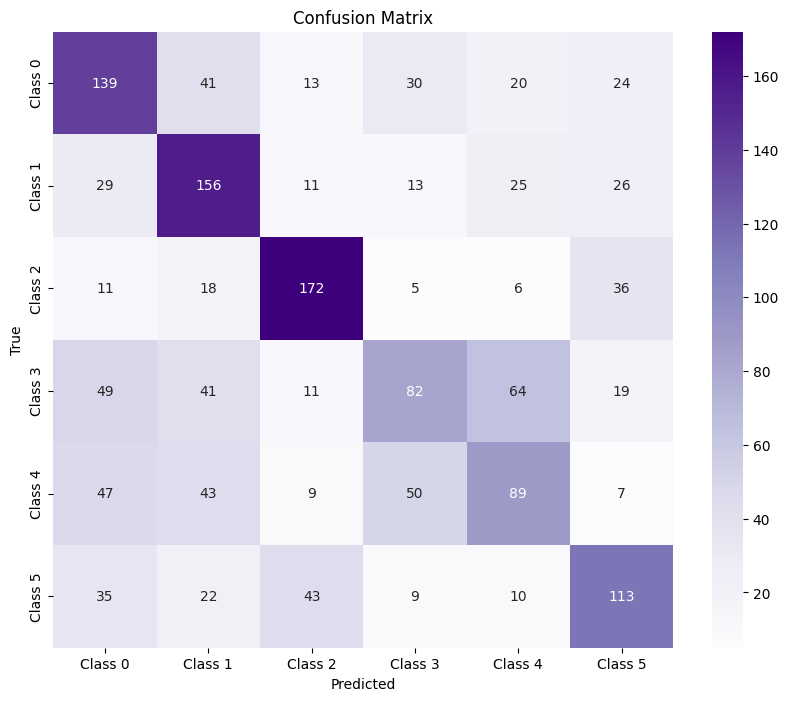

In [52]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=[f'Class {i}' for i in range(6)], yticklabels=[f'Class {i}' for i in range(6)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
final_model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
/